# Usage

You can just Run All cells and get result.

In [1]:
using Flux
using Flux: params
using Plots
using BSON: @save, @load
using Statistics
include("src/parsing.jl")

Main.parsing

In [2]:
# load data
rdf10 = parsing.read_rdf_vector("rdf_data/10CH3OH-CG.rdf");
rdf20 = parsing.read_rdf_vector("rdf_data/20CH3OH-CG.rdf");
rdf30 = parsing.read_rdf_vector("rdf_data/30CH3OH-CG.rdf");
rdf40 = parsing.read_rdf_vector("rdf_data/40CH3OH-CG.rdf");
rdf50 = parsing.read_rdf_vector("rdf_data/50CH3OH-CG.rdf");
rdf60 = parsing.read_rdf_vector("rdf_data/60CH3OH-CG.rdf");
rdf70 = parsing.read_rdf_vector("rdf_data/70CH3OH-CG.rdf");
rdf80 = parsing.read_rdf_vector("rdf_data/80CH3OH-CG.rdf");
rdf90 = parsing.read_rdf_vector("rdf_data/90CH3OH-CG.rdf");
rdf100 = parsing.read_rdf_vector("rdf_data/100CH3OH-CG.rdf");

# Training for concentrations = [100, 60, 40, 20]

In [3]:
# Define your TRAINING dataset
X = [100, 60, 40, 20]               # Concentrations
Y = [rdf100, rdf60, rdf40, rdf20]   # Corresponding RDF data with the same order as X

# Combine the date to one training data frame
data = [([X[i]], Y[i]) for i in 1:length(X)];

In [4]:
# Define the model
model = Chain(
    Dense(1, 300, identity)     # One layer with linear activational function.
)

# Define the loss function and optimizer
loss(x, y) = Flux.mse(model(x), y)


loss (generic function with 1 method)

In [5]:
for i in 1:8
    lr = 0.1 / 10^(i - 1)
    println("Learning rate: $(lr)")
    optimizer = Adam(lr)

    epochs = 5000
    for epoch in 1:epochs
        for (x, y) in data
            gs = gradient(() -> loss(x, y), params(model))
            Flux.Optimise.update!(optimizer, params(model), gs)
        end
        if (epoch % 1000 == 0)
            println("  Epoch $epoch:  Loss: $(loss(data[1][1], data[1][2]))")
        end
    end
end


Learning rate: 0.1


  Epoch 1000:  Loss: 8.665373


  Epoch 2000:  Loss: 5.6890187
  Epoch 3000:  Loss: 5.2451205


  Epoch 4000:  Loss: 7.260073
  Epoch 5000:  Loss: 5.5024414
Learning rate: 0.01


  Epoch 1000:  Loss: 0.05908009
  Epoch 2000:  Loss: 0.063776925


  Epoch 3000:  Loss: 0.058060743
  Epoch 4000:  Loss: 0.069419116


  Epoch 5000:  Loss: 0.08291166
Learning rate: 0.001
  Epoch 1000:  Loss: 0.00057647726


  Epoch 2000:  Loss: 0.0002967771
  Epoch 3000:  Loss: 0.000534252


  Epoch 4000:  Loss: 0.0004829768
  Epoch 5000:  Loss: 0.00050365884
Learning rate: 0.0001


  Epoch 1000:  Loss: 4.2558797e-5
  Epoch 2000:  Loss: 4.2902575e-5


  Epoch 3000:  Loss: 4.100046e-5
  Epoch 4000:  Loss: 4.2501346e-5


  Epoch 5000:  Loss: 4.1094187e-5
Learning rate: 1.0e-5
  Epoch 1000:  Loss: 3.7581587e-5


  Epoch 2000:  Loss: 3.7711776e-5
  Epoch 3000:  Loss: 3.7789738e-5


  Epoch 4000:  Loss: 3.7861373e-5
  Epoch 5000:  Loss: 3.7865826e-5
Learning rate: 1.0e-6


  Epoch 1000:  Loss: 3.7623693e-5
  Epoch 2000:  Loss: 3.760181e-5


  Epoch 3000:  Loss: 3.7580336e-5
  Epoch 4000:  Loss: 3.755958e-5


  Epoch 5000:  Loss: 3.754404e-5
Learning rate: 1.0000000000000001e-7
  Epoch 1000:  Loss: 3.750838e-5


  Epoch 2000:  Loss: 3.7508562e-5
  Epoch 3000:  Loss: 3.750854e-5


  Epoch 4000:  Loss: 3.750854e-5
  Epoch 5000:  Loss: 3.7508544e-5
Learning rate: 1.0e-8


  Epoch 1000:  Loss: 3.746777e-5
  Epoch 2000:  Loss: 3.745817e-5


  Epoch 3000:  Loss: 3.7458456e-5
  Epoch 4000:  Loss: 3.7458474e-5


  Epoch 5000:  Loss: 3.745848e-5


# Results
## Plots for Training data sets

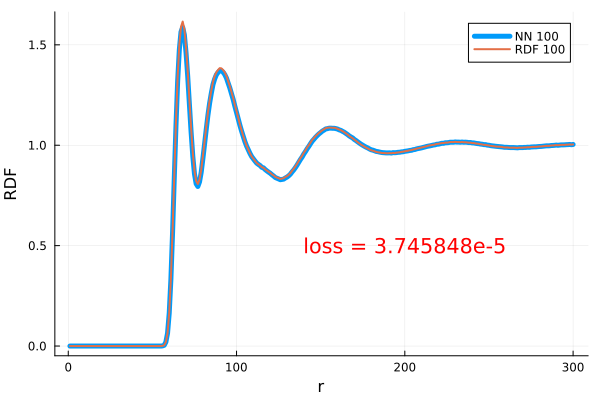

In [6]:
plot(model([100]), lw=5, label="NN 100", xlabel="r", ylabel="RDF")
plot!(rdf100, lw=2, label="RDF 100")
annotate!(200, 0.5, "loss = $(loss([100], rdf100))", :red)

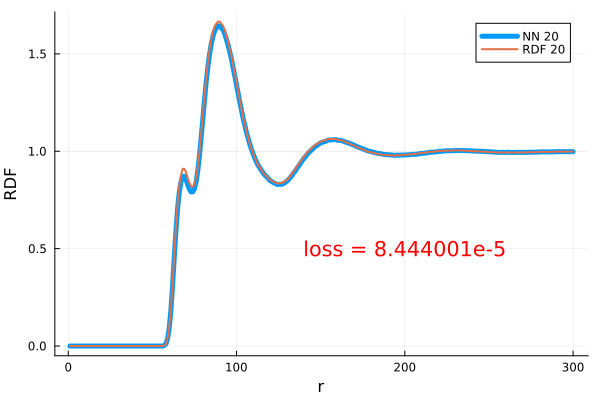

In [7]:
plot(model([20]), lw=5, label="NN 20", xlabel="r", ylabel="RDF")
plot!(rdf20, lw=2, label="RDF 20")
annotate!(200, 0.5, "loss = $(loss([20], rdf20))", :red)

## Plots for Testing data sets

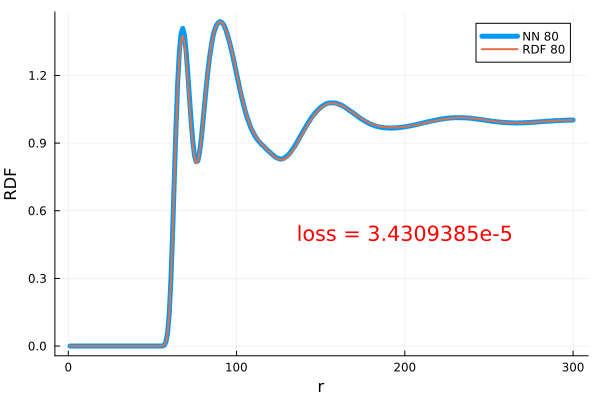

In [8]:
plot(model([80]), lw=5, label="NN 80", xlabel="r", ylabel="RDF")
plot!(rdf80, lw=2, label="RDF 80")
annotate!(200, 0.5, "loss = $(loss([80], rdf80))", :red)

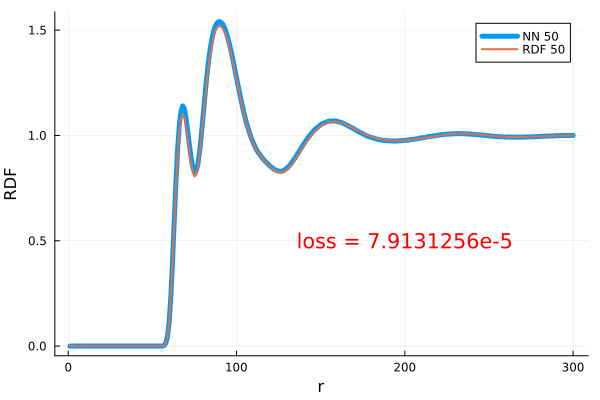

In [9]:
plot(model([50]), lw=5, label="NN 50", xlabel="r", ylabel="RDF")
plot!(rdf50, lw=2, label="RDF 50")
annotate!(200, 0.5, "loss = $(loss([50], rdf50))", :red)

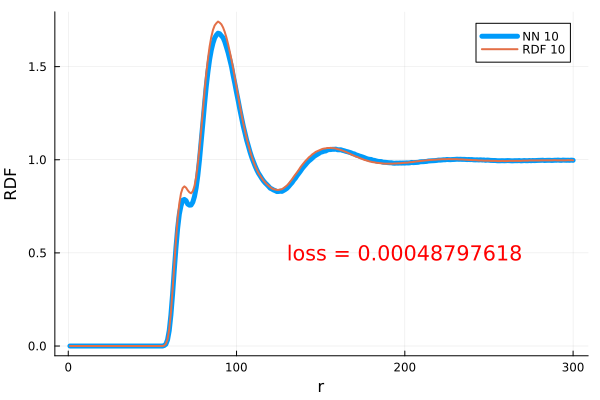

In [10]:
plot(model([10]), lw=5, label="NN 10", xlabel="r", ylabel="RDF")
plot!(rdf10, lw=2, label="RDF 10")
annotate!(200, 0.5, "loss = $(loss([10], rdf10))", :red)

## Smile-plot

In [11]:
losses = [loss([10], rdf10), loss([20], rdf20), loss([30], rdf30),
    loss([40], rdf40), loss([50], rdf50), loss([60], rdf60), loss([70], rdf70),
    loss([80], rdf80), loss([90], rdf90), loss([100], rdf100)]

10-element Vector{Float32}:
 0.00048797618
 8.444001f-5
 3.5808448f-6
 3.8510192f-5
 7.9131256f-5
 8.910568f-5
 7.376294f-5
 3.4309385f-5
 6.844531f-6
 3.745848f-5

In [12]:
println("Mean value of all losses: $(mean(losses))")

Mean value of all losses: 9.351195e-5


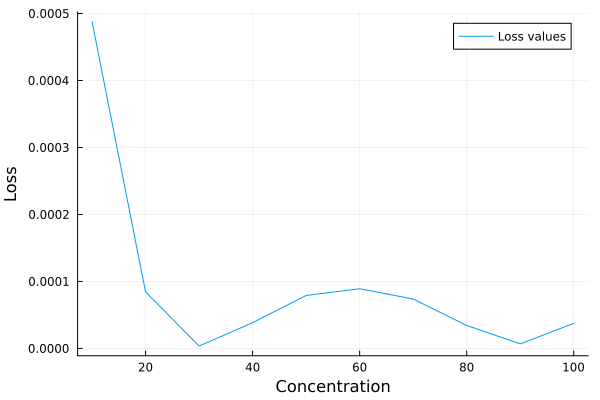

In [13]:
losses_x = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot(losses_x, losses, label="Loss values", xlabel="Concentration", ylabel="Loss")

In [14]:
@save "model-20-40-60-100.bson" model

## Interpreting model

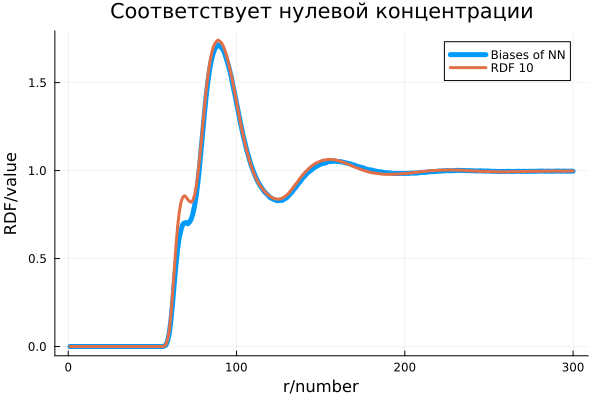

In [15]:
plot(params(model)[2], lw=5, title="Соответствует нулевой концентрации", label="Biases of NN", xlabel="r/number", ylabel="RDF/value")
plot!(rdf10, lw=3, label="RDF 10")

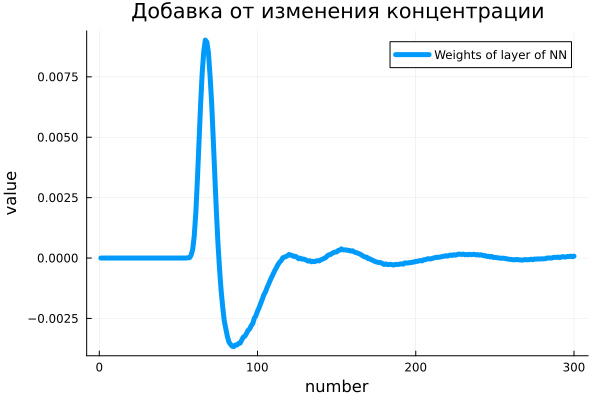

In [16]:
plot(params(model)[1], lw=5, title="Добавка от изменения концентрации", label="Weights of layer of NN", xlabel="number", ylabel="value")

# Training for ALL concentrations

In [17]:
# Define your TRAINING dataset
X = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]                                   # Concentrations
Y = [rdf100, rdf90, rdf80, rdf70, rdf60, rdf50, rdf40, rdf30, rdf20, rdf10]     # Corresponding RDF data with the same order as X

# Combine the date to one training data frame
data = [([X[i]], Y[i]) for i in 1:length(X)];

In [18]:
# Define the model
model = Chain(
    Dense(1, 300, identity)     # One layer with linear activational function.
)

# Define the loss function and optimizer
loss(x, y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

In [19]:
for i in 1:8
    lr = 0.1 / 10^(i - 1)
    println("Learning rate: $(lr)")
    optimizer = Adam(lr)

    epochs = 5000
    for epoch in 1:epochs
        for (x, y) in data
            gs = gradient(() -> loss(x, y), params(model))
            Flux.Optimise.update!(optimizer, params(model), gs)
        end
        if (epoch % 1000 == 0)
            println("  Epoch $epoch:  Loss: $(loss(data[1][1], data[1][2]))")
        end
    end
end


Learning rate: 0.1


  Epoch 1000:  Loss: 47.638405


  Epoch 2000:  Loss: 70.53845


  Epoch 3000:  Loss: 24.620312


  Epoch 4000:  Loss: 141.43915


  Epoch 5000:  Loss: 24.9931
Learning rate: 0.01


  Epoch 1000:  Loss: 1.4222015


  Epoch 2000:  Loss: 0.8377778


  Epoch 3000:  Loss: 1.4629472


  Epoch 4000:  Loss: 1.5111822


  Epoch 5000:  Loss: 1.1269554
Learning rate: 0.001


  Epoch 1000:  Loss: 0.013665436


  Epoch 2000:  Loss: 0.0105331475


  Epoch 3000:  Loss: 0.0076212916


  Epoch 4000:  Loss: 0.008267633


  Epoch 5000:  Loss: 0.011013906
Learning rate: 0.0001


  Epoch 1000:  Loss: 0.0002265877


  Epoch 2000:  Loss: 0.00025675827


  Epoch 3000:  Loss: 0.00027966237


  Epoch 4000:  Loss: 0.0002453236


  Epoch 5000:  Loss: 0.00024868903
Learning rate: 1.0e-5


  Epoch 1000:  Loss: 0.00015560251


  Epoch 2000:  Loss: 0.00015649058


  Epoch 3000:  Loss: 0.00015685573


  Epoch 4000:  Loss: 0.00015675093


  Epoch 5000:  Loss: 0.00015685758
Learning rate: 1.0e-6


  Epoch 1000:  Loss: 0.00015324564


  Epoch 2000:  Loss: 0.00015322593


  Epoch 3000:  Loss: 0.0001531759


  Epoch 4000:  Loss: 0.00015311074


  Epoch 5000:  Loss: 0.00015305061
Learning rate: 1.0000000000000001e-7


  Epoch 1000:  Loss: 0.0001527127


  Epoch 2000:  Loss: 0.00015271267


  Epoch 3000:  Loss: 0.0001527127


  Epoch 4000:  Loss: 0.0001527127


  Epoch 5000:  Loss: 0.00015271275
Learning rate: 1.0e-8


  Epoch 1000:  Loss: 0.00015260883


  Epoch 2000:  Loss: 0.00015258888


  Epoch 3000:  Loss: 0.00015259186


  Epoch 4000:  Loss: 0.00015259073


  Epoch 5000:  Loss: 0.00015259073


In [20]:
losses = [loss([10], rdf10), loss([20], rdf20), loss([30], rdf30),
    loss([40], rdf40), loss([50], rdf50), loss([60], rdf60), loss([70], rdf70),
    loss([80], rdf80), loss([90], rdf90), loss([100], rdf100)]

10-element Vector{Float32}:
 0.00025241077
 2.0775442f-5
 2.1276375f-5
 7.2291536f-5
 9.368511f-5
 7.46891f-5
 3.853763f-5
 6.765853f-6
 2.7085514f-5
 0.00015259073

In [21]:
println("Mean value of all losses: $(mean(losses))")

Mean value of all losses: 7.601081e-5


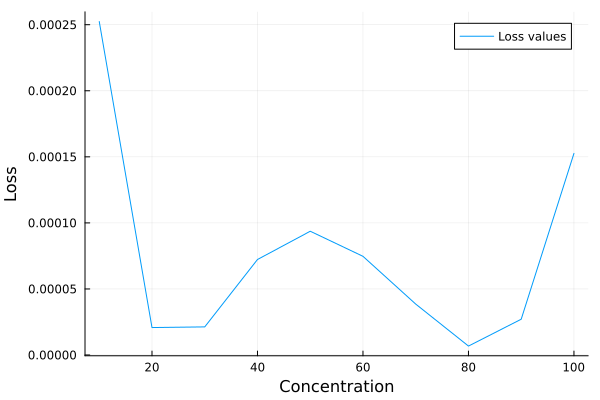

In [22]:
plot(losses_x, losses, label="Loss values", xlabel="Concentration", ylabel="Loss")

In [23]:
@save "model-all.bson" model